In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Create folder to save our processed data
output_dir = Path('../data/processed')
output_dir.mkdir(parents=True, exist_ok=True)


Ready to start!


In [11]:
# Load your main dataset
df = pd.read_csv('../content/dataset.csv')
print(f"Your dataset has {len(df)} rows and {len(df.columns)} columns")
print(f"Column names: {list(df.columns)}")

# Show first few rows
print("First 5 rows of your data:")
display(df.head())

Your dataset has 4920 rows and 18 columns
Column names: ['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15', 'Symptom_16', 'Symptom_17']
First 5 rows of your data:


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
print("Cleaning your data...")

# Make a copy of your data (FIXED: added parentheses)
df_clean = df.copy()

# Since you don't want to remove duplicates, we'll skip that
print(f"Keeping all {len(df_clean)} rows (no duplicates removed)")

# Clean up text (remove extra spaces)
for col in df_clean.columns:
    if df_clean[col].dtype == 'object':
        df_clean[col] = df_clean[col].str.strip()

# Fill missing values with 'None'
symptom_columns = df_clean.columns[1:18]  # Columns 1 to 17 are symptoms
df_clean[symptom_columns] = df_clean[symptom_columns].fillna('None')

print(f"Clean data has {len(df_clean)} rows")
print(f"Columns cleaned: {list(symptom_columns)}")

Cleaning your data...
Keeping all 4920 rows (no duplicates removed)
Clean data has 4920 rows
Columns cleaned: ['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15', 'Symptom_16', 'Symptom_17']


In [15]:
df_clean.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,Fungal infection,itching,skin_rash,dischromic _patches,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [18]:
print("Finding all symptoms...")

# Get all unique symptoms from your data
all_symptoms = set()
for col in symptom_columns:
    symptoms_in_col = df_clean[col].unique()
    all_symptoms.update(symptoms_in_col)

# Remove 'None' from the list
all_symptoms.discard('None')
all_symptoms = sorted(list(all_symptoms))

print(f"Found {len(all_symptoms)} different symptoms")
print(f"symptoms: {all_symptoms}")

Finding all symptoms...
Found 131 different symptoms
symptoms: ['abdominal_pain', 'abnormal_menstruation', 'acidity', 'acute_liver_failure', 'altered_sensorium', 'anxiety', 'back_pain', 'belly_pain', 'blackheads', 'bladder_discomfort', 'blister', 'blood_in_sputum', 'bloody_stool', 'blurred_and_distorted_vision', 'breathlessness', 'brittle_nails', 'bruising', 'burning_micturition', 'chest_pain', 'chills', 'cold_hands_and_feets', 'coma', 'congestion', 'constipation', 'continuous_feel_of_urine', 'continuous_sneezing', 'cough', 'cramps', 'dark_urine', 'dehydration', 'depression', 'diarrhoea', 'dischromic _patches', 'distention_of_abdomen', 'dizziness', 'drying_and_tingling_lips', 'enlarged_thyroid', 'excessive_hunger', 'extra_marital_contacts', 'family_history', 'fast_heart_rate', 'fatigue', 'fluid_overload', 'foul_smell_of urine', 'headache', 'high_fever', 'hip_joint_pain', 'history_of_alcohol_consumption', 'increased_appetite', 'indigestion', 'inflammatory_nails', 'internal_itching', 'ir

In [19]:
print("Creating one-hot encoding...")

# Create a big table of zeros (rows = patients, columns = symptoms)
one_hot_matrix = np.zeros((len(df_clean), len(all_symptoms)))

# Create a dictionary to find symptom positions quickly
symptom_to_index = {symptom: idx for idx, symptom in enumerate(all_symptoms)}

# Fill the matrix: put 1 where a patient has a symptom
for row_idx, row in df_clean.iterrows():
    for col in symptom_columns:
        symptom = row[col]
        if symptom != 'None' and symptom in symptom_to_index:
            one_hot_matrix[row_idx, symptom_to_index[symptom]] = 1

# Convert to DataFrame
one_hot_df = pd.DataFrame(one_hot_matrix, columns=all_symptoms)

# Combine with disease column
df_encoded = pd.concat([df_clean[['Disease']], one_hot_df], axis=1)

print(f"Done! New dataset has {len(df_encoded)} rows and {len(df_encoded.columns)} columns")
print(f"Number of symptoms: {len(all_symptoms)}")
print(f"Number of diseases: {df_encoded['Disease'].nunique()}")

Creating one-hot encoding...
Done! New dataset has 4920 rows and 132 columns
Number of symptoms: 131
Number of diseases: 41


In [22]:
print("Adding simple features...")

# Count how many symptoms each patient has
df_encoded['total_symptoms'] = df_encoded[all_symptoms].sum(axis=1)

# Calculate percentage of symptoms (out of 17 possible)
df_encoded['symptom_percentage'] = df_encoded['total_symptoms'] / 17 * 100

print(f"Added 2 safe features:")
print(f"   • total_symptoms: How many symptoms each patient has")
print(f"   • symptom_percentage: Percentage of symptoms (0-100%)")

# Show some statistics
print(f"Statistics:")
print(f"   Average symptoms per patient: {df_encoded['total_symptoms'].mean():.1f}")
print(f"   Most symptoms any patient has: {df_encoded['total_symptoms'].max()}")
print(f"   Least symptoms any patient has: {df_encoded['total_symptoms'].min()}")
print(f"   Average symptom percentage: {df_encoded['symptom_percentage'].mean():.1f}%")

Adding simple features...
Added 2 safe features:
   • total_symptoms: How many symptoms each patient has
   • symptom_percentage: Percentage of symptoms (0-100%)
Statistics:
   Average symptoms per patient: 7.4
   Most symptoms any patient has: 17.0
   Least symptoms any patient has: 3.0
   Average symptom percentage: 43.8%


Creating simple charts...


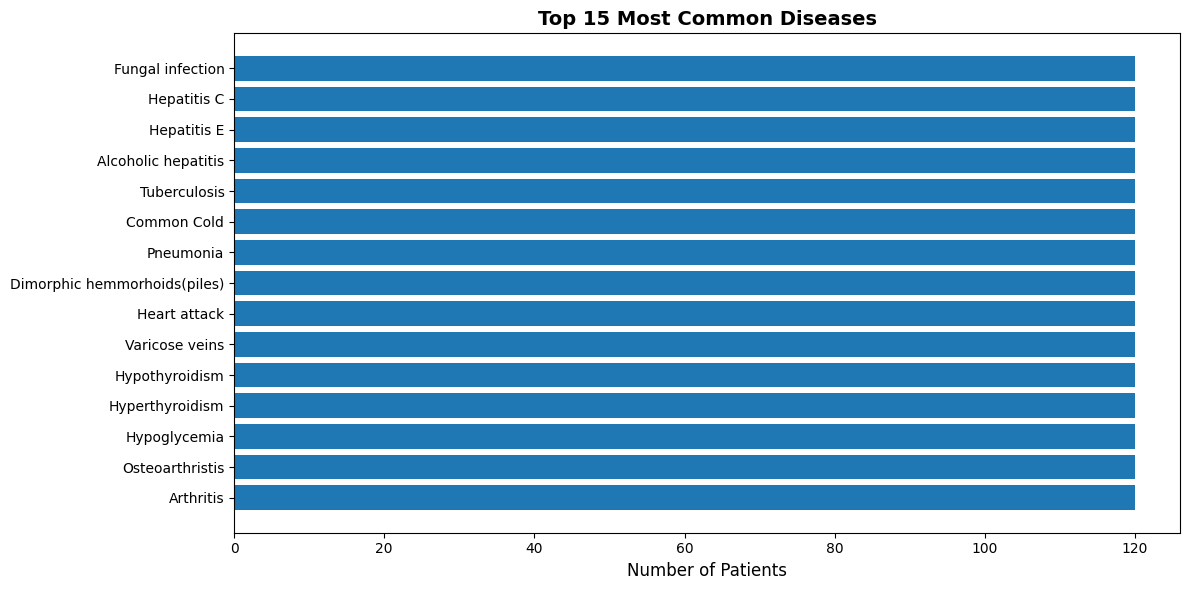

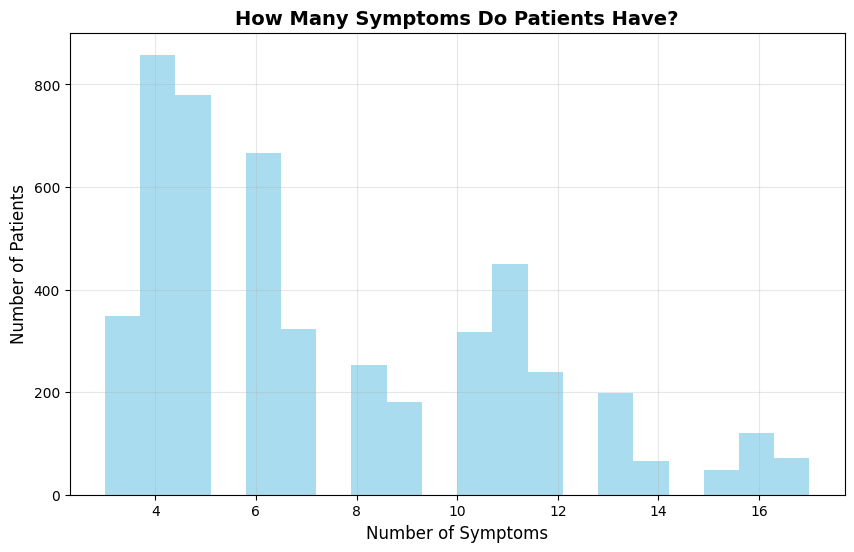

In [23]:
print("Creating simple charts...")

# Create a simple chart showing disease distribution
plt.figure(figsize=(12, 6))
top_diseases = df_encoded['Disease'].value_counts().head(15)
plt.barh(range(len(top_diseases)), top_diseases.values)
plt.yticks(range(len(top_diseases)), top_diseases.index, fontsize=10)
plt.title('Top 15 Most Common Diseases', fontsize=14, fontweight='bold')
plt.xlabel('Number of Patients', fontsize=12)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Create a chart showing symptom distribution
plt.figure(figsize=(10, 6))
plt.hist(df_encoded['total_symptoms'], bins=20, alpha=0.7, color='skyblue')
plt.title('How Many Symptoms Do Patients Have?', fontsize=14, fontweight='bold')
plt.xlabel('Number of Symptoms', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

In [24]:
print("Saving all your processed data...")

# Save the main processed dataset
df_encoded.to_csv(output_dir / 'processed_dataset.csv', index=False)
print(f"Saved main dataset: processed_dataset.csv")

# Save list of all symptoms
symptom_df = pd.DataFrame({'symptom': all_symptoms})
symptom_df.to_csv(output_dir / 'symptoms_list.csv', index=False)
print(f"Saved symptoms list: symptoms_list.csv")

# Save disease information
disease_info = df_encoded['Disease'].value_counts().reset_index()
disease_info.columns = ['disease', 'count']
disease_info['percentage'] = (disease_info['count'] / len(df_encoded) * 100).round(2)
disease_info.to_csv(output_dir / 'disease_distribution.csv', index=False)
print(f"Saved disease info: disease_distribution.csv")

# Save a simple summary
summary = {
    'total_patients': len(df_encoded),
    'total_diseases': df_encoded['Disease'].nunique(),
    'total_symptoms': len(all_symptoms),
    'avg_symptoms_per_patient': round(df_encoded['total_symptoms'].mean(), 2)
}

summary_df = pd.DataFrame([summary])
summary_df.to_csv(output_dir / 'summary.csv', index=False)
print(f"Saved summary: summary.csv")


Saving all your processed data...
Saved main dataset: processed_dataset.csv
Saved symptoms list: symptoms_list.csv
Saved disease info: disease_distribution.csv
Saved summary: summary.csv
